In [1]:
from signalTeste import *
from interface import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
#import wave
import time
import pickle
import peakutils
#import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
sig = signalMeu()
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1
print("EE")

EE


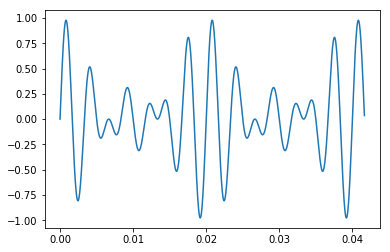

In [3]:
#Ex. De geração de sinal
#sig.generateSin(frequency, amplitude, duration)

time, sinal = sig.generateSin(350,1,2,fs)
time, sinal1 = sig.generateSin(250,1,2,fs)
time, sinal2 = sig.generateSin(300,1,2,fs)
sinalF = np.add(sinal, sinal1)
sinalF = np.add(sinalF, sinal2)/3
#sd.playrec(inputArray, samplingFrequency, channels)
sd.playrec(sinalF, fs, channels=1)
plt.plot(time[:2000], sinalF[:2000])
plt.show()

In [4]:
#
sig.plotFFT(sinalF[:48000],fs)

NameError: name 'plt' is not defined

In [5]:
#Helper Function to generate the signal as a telephone
def geraNum(number, amplitude=1, duration = 1, fs=48000):
    listaFreq = [[941,1336], [697,1209],
                 [697,1336], [697,1477],
                 [770,1209], [770,1336],
                 [770,1477], [852,1209],
                 [852,1336], [852,1477] ]
    #print(listaFreq[number])
    time, sinal = sig.generateSin(listaFreq[number][0],amplitude,duration,fs)
    time, sinal1 = sig.generateSin(listaFreq[number][1],amplitude,duration,fs)
    sinalF = np.add(sinal, sinal1)/2
    
    return time,sinalF

In [6]:
#Recebe uma string de números (número de celular, por examplo) e junta pra fazer o dial
def geraSeq(numero, pressTime = 0.25, intervalTime = 0.05, fs=48000):
    delay = np.zeros(int(intervalTime*fs))
    finalSignal = []
    for digit in range(len(numero)-1):
        tempo, signal = geraNum(int(numero[digit]), duration=pressTime)
        finalSignal.append(signal)
        finalSignal.append(delay)
    tempo, signal = geraNum(int(numero[-1]), duration=pressTime)
    finalSignal.append(signal)
    finalSignal = np.concatenate(finalSignal)
    
    return finalSignal


finalSignal = geraSeq("946337814")
myrecording = sd.playrec(finalSignal, fs, channels=1)
#plt.plot(tempo[:500], sinalao[:500])
#plt.show()

In [4]:
finalSignal = geraSeq("1")
myrecording = sd.playrec(finalSignal, fs, channels=1)

NameError: name 'geraSeq' is not defined

In [36]:
num = numero()
print(num)

1
str


In [6]:
tempo, sinalao = geraNum(number=numero(), duration=2)
myrecording = sd.playrec(sinalao, fs, channels=1)
#sinalao = np.concatenate([sinalao,sinalF])

In [126]:
duration = 2
myrecording = sd.rec(int(duration * fs))
sd.wait()

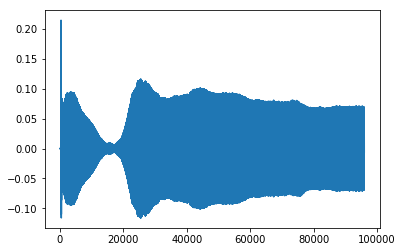

In [127]:
plt.plot(myrecording)
plt.show()

In [128]:
listaFreq = [[941,1336], [697,1209],
             [697,1336], [697,1477],
             [770,1209], [770,1336],
             [770,1477], [852,1209],
             [852,1336], [852,1477] ]

In [135]:
cache = myrecording[0:fs,0]
frequencias,FFArray = sig.calcFFT(cache, fs)
frequencias = frequencias[:5000]
FFArray = FFArray[:5000]
indexes = peakutils.indexes(FFArray, thres=0.5, min_dist=70)
print(indexes)

indexes2 = []
p1num = []
p2num = []
for i in range(len(indexes)):
    indexes2.append(round(indexes[i]+2))
    indexes2.append(round(indexes[i]+1))
    indexes2.append(round(indexes[i]))
    indexes2.append(round(indexes[i]-1))
    indexes2.append(round(indexes[i]-2))
print(indexes2)
number = 10
for i in range(len(indexes2)):
    for j in range(len(listaFreq)):
        if indexes2[i] == listaFreq[j][0]:
            p1num.append(j)
            print(p1num)
        if indexes2[i] == listaFreq[j][1]:
            p2num.append(j)
            print(p2num)


[120 201 272]
[122, 121, 120, 119, 118, 203, 202, 201, 200, 199, 274, 273, 272, 271, 270]


In [136]:
for i in range(len(p1num)):
    for j in range(len(p2num)):
        if p1num[i] == p2num[j]:
            numero = p1num[i]
        else:
            numero = 10

In [137]:
if numero < 10:
    print(numero)
else:
    print("erro")

1
